In [6]:
import numpy as np
import pandas as pd
from itertools import *

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['figure.figsize'] = [7,8]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 200

mpl.rcParams['font.size'] = 17
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['lines.markersize'] = 10

sns.set_context('poster')

from pprint import pprint

import imp

from scipy.stats import entropy
entropy_fix = np.log2(np.e)

In [10]:
all_n_topics = [10, 15, 20, 25, 30, 50, 70, 90]

In [9]:
years = range(1947,2017)

infiles = [ 'data/%d.csv' % d for d in years ]

# create DataFrame for all articles
df_alldocs = pd.DataFrame()

for infile in infiles:

    df_year = pd.read_csv(infile, index_col=0)
    df_year = df_year[pd.notnull(df_year['text'])]
    del df_year['text']
    
    # uncomment for short run
    #df = df.head(50)
    
    df_alldocs = df_alldocs.append(df_year)

In [11]:
doc_to_date = { row.filename:(row.year, row.week) for _, row in df_alldocs.iterrows() }
all_dates = set(sorted(doc_to_date.values()))

In [13]:
def corrected_entropy(v, filler=1e-5):
    minv = min(v)
    v2 = [ i if i > minv else filler for i in v ]
    return entropy(v2)*entropy_fix

# Calculate effective number of issues per year

Running for K=10 topics


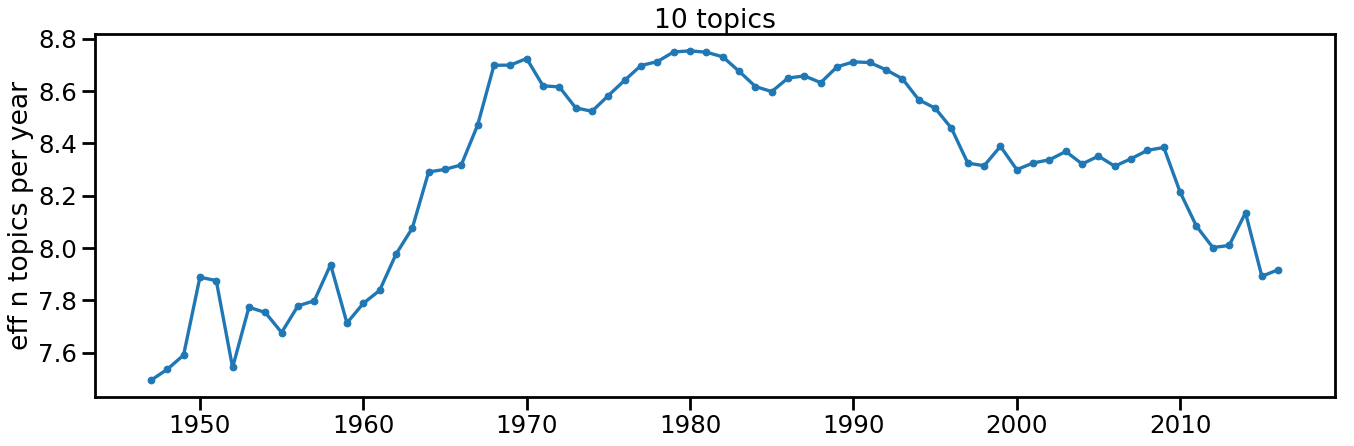

Running for K=15 topics


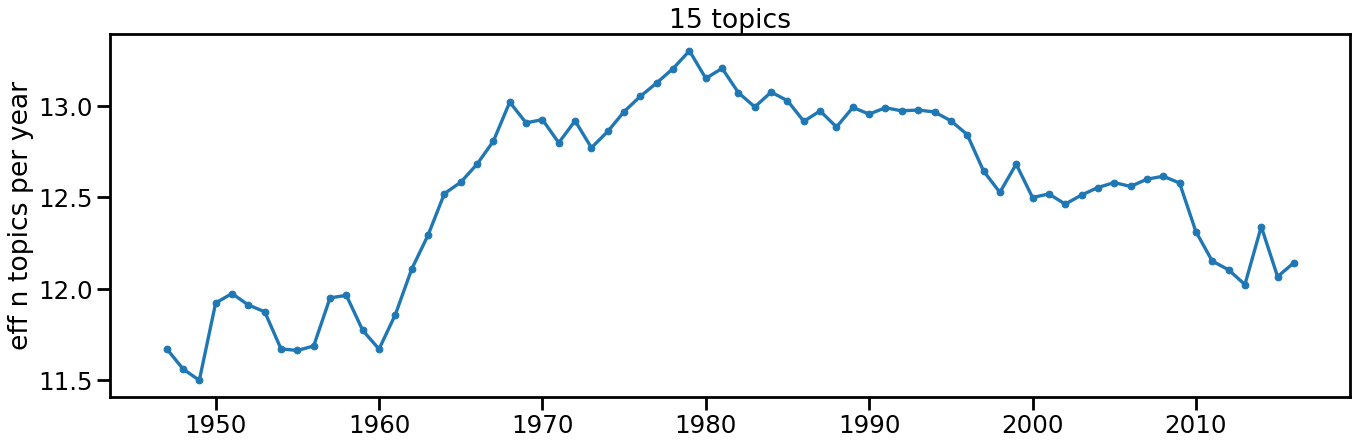

Running for K=20 topics


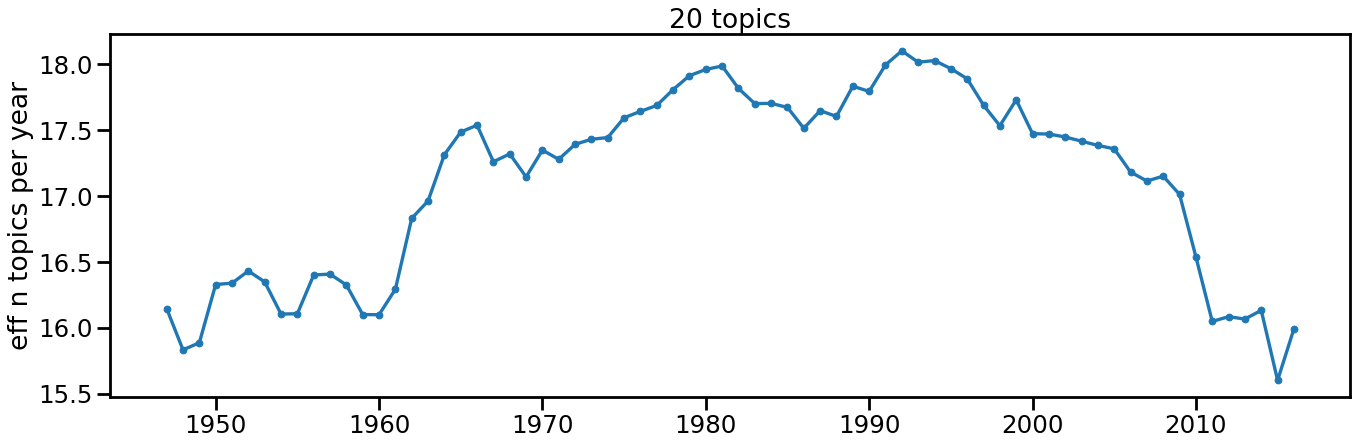

Running for K=25 topics


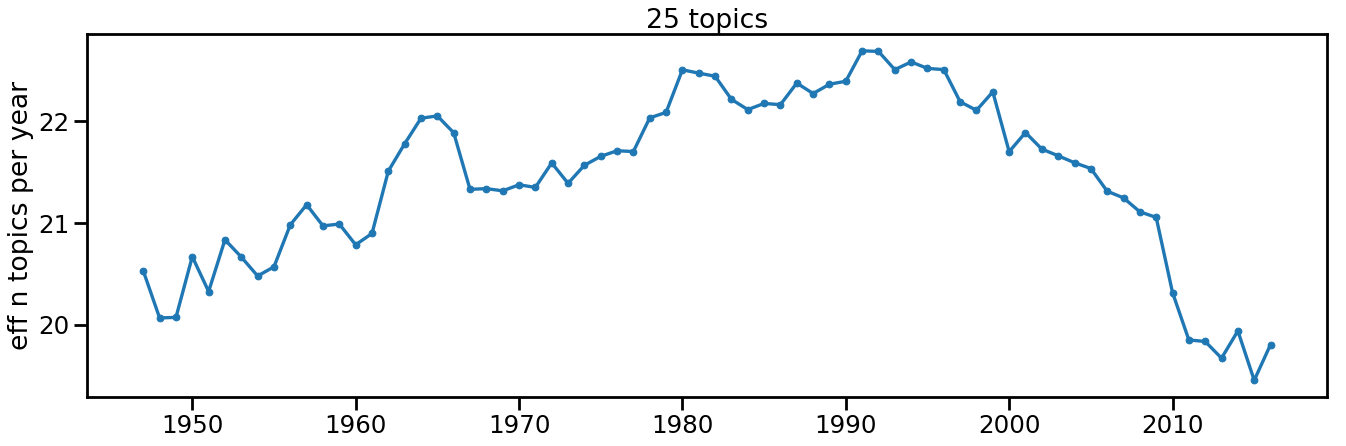

Running for K=30 topics


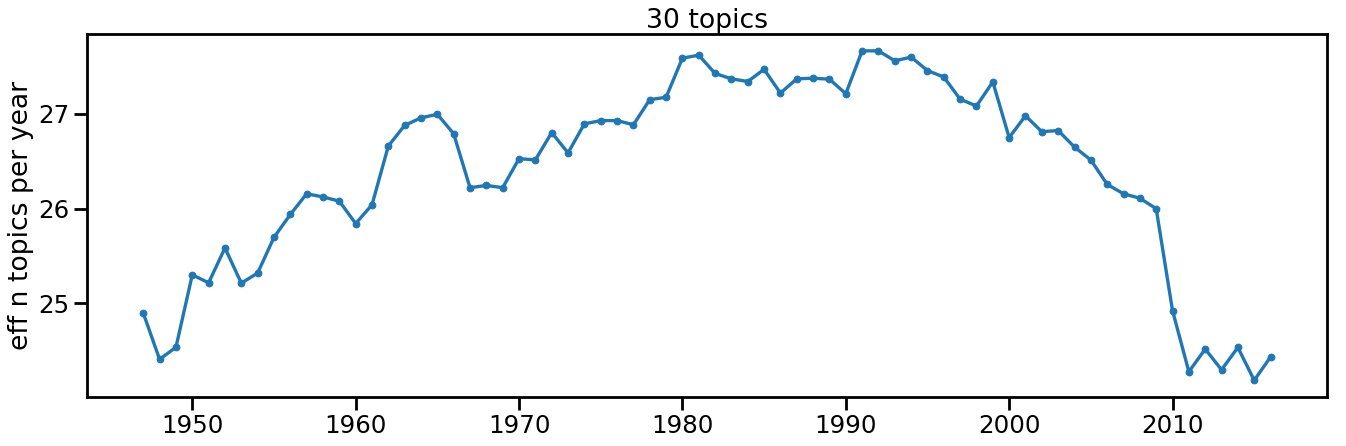

Running for K=50 topics


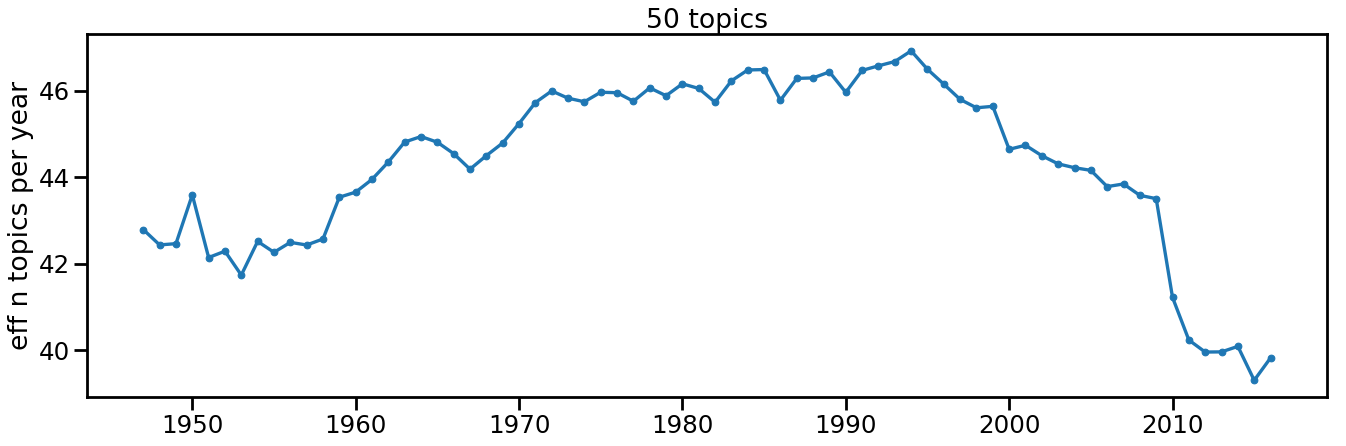

Running for K=70 topics


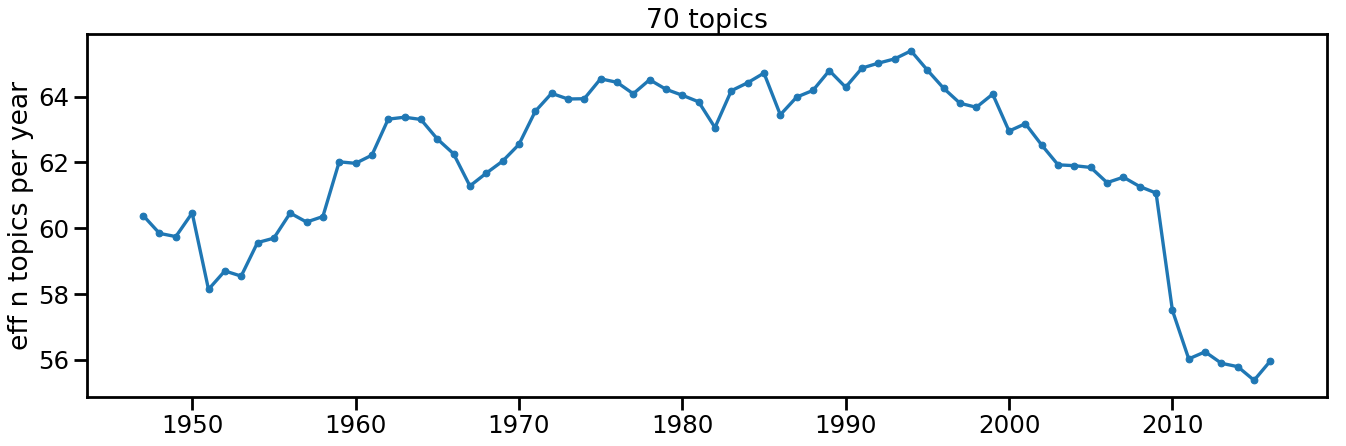

Running for K=90 topics


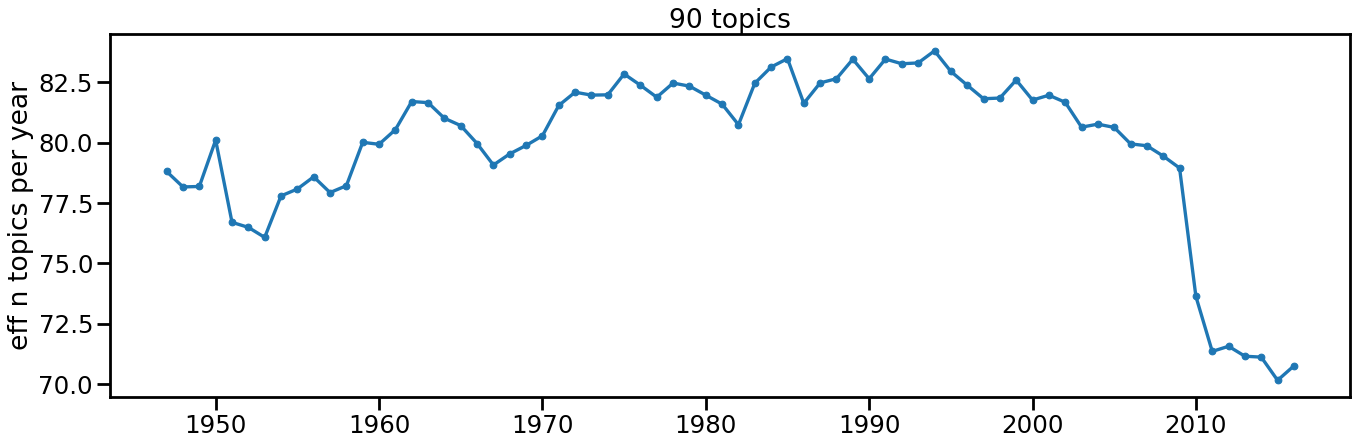

In [20]:
for n_topics in all_n_topics:
    print("Running for K={} topics".format(n_topics))

    #words_per_topic     = pd.read_csv('data/topic_word_distributions_'+str(n_topics)+'topics.csv', index_col=0)
    topics_per_document = pd.read_csv('data/document_topic_distributions_'+str(n_topics)+'topics.csv', index_col=0)

    table = topics_per_document
    topics_per_year = {}

    for index, row in table.iterrows():
        topic_array = np.array(row.values,dtype=np.float64)
        year = doc_to_date[index][0]
        if year not in topics_per_year:
            topics_per_year[year]  = topic_array
        else:
            topics_per_year[year] += topic_array

    eff_n_topics_per_year = [ 2**corrected_entropy(topics_per_year[year]) for year in years ]

    plt.figure(figsize=(20,6))
    plt.plot(years, eff_n_topics_per_year, '.-');
    plt.ylabel('eff n topics per year');
    plt.title('{} topics'.format(n_topics))
    plt.savefig('images/eff_n_topics_per_year_{}topics_GER.png'.format(n_topics))
    plt.show()

_______________

In [5]:
"""
table = topics_per_document

all_entropies = []
n_issues = []

for index, row in table.iterrows():
    topic_array = np.array(row.values,dtype=np.float64)
    all_entropies += [ corrected_entropy(topic_array) ]
    minrow = min(row)
    n_issues      += [ sum(row.values>minrow) ]

all_entropies = np.array(all_entropies)
n_issues      = np.array(n_issues)
"""

In [ ]:
"""
all_documents = topics_per_document.index.values

from datetime import datetime
import time

dates = [ datetime.fromtimestamp(time.mktime(time.strptime('{} {} 1'.format(date[0],date[1]), '%Y %W %w'))) 
         for date in sorted(all_dates)]
"""

In [ ]:
"""
doc_to_entropy = { doc:s for doc,s in zip(all_documents, all_entropies) }
date_to_entropies = [ [ doc_to_entropy[doc] for doc in doc_to_date if doc_to_date[doc] == date ] \
                      for date in all_dates ]

doc_to_n_issues   = { doc:n for doc,n in zip(all_documents, n_issues) }
date_to_n_issue   = [ [ doc_to_n_issues[doc] for doc in doc_to_date if doc_to_date[doc] == date ] \
                      for date in all_dates ]
"""

In [60]:
table = topics_per_document

topics_per_date = {}

sorted_dates = []

for index, row in table.iterrows():
    topic_array = np.array(row.values,dtype=np.float64)
    date = doc_to_date[index]
    date = str(date[0])+'-'+str(date[1]).zfill(2)
    if date not in topics_per_date:
        topics_per_date[date]  = topic_array
        sorted_dates += [ date ]
    else:
        topics_per_date[date] += topic_array
        
sorted_dates = sorted(sorted_dates)        

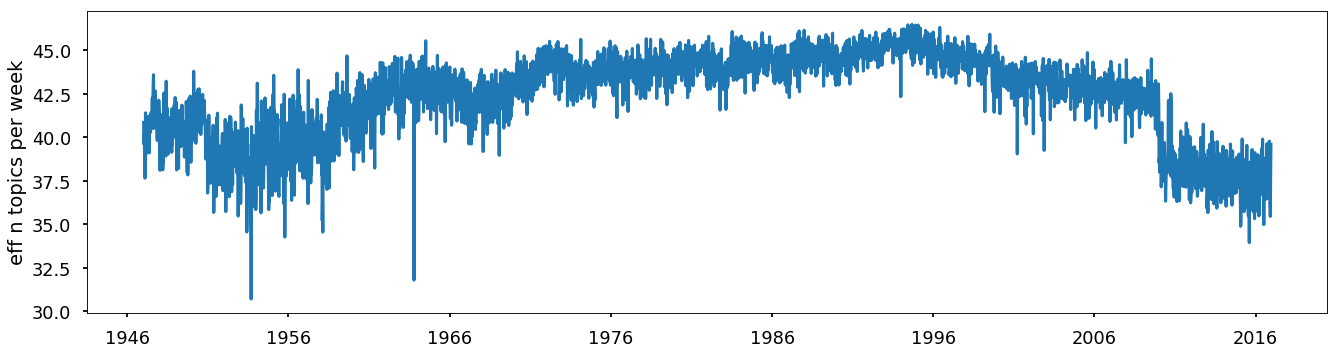

In [107]:
eff_n_topics_per_date = [ 2**corrected_entropy(topics_per_date[date]) for date in sorted_dates ]

dates_x = [ datetime.fromtimestamp(time.mktime(time.strptime('{} {} 1'.format(date[:4],date[-2:]), '%Y %W %w')))  for date in sorted_dates]

plt.figure(figsize=(20,5))
plt.plot(dates_x, eff_n_topics_per_date);
plt.ylabel('eff n topics per week');
plt.savefig('images/eff_n_topics_per_week.png')

________________

1953-09-07 00:00:00


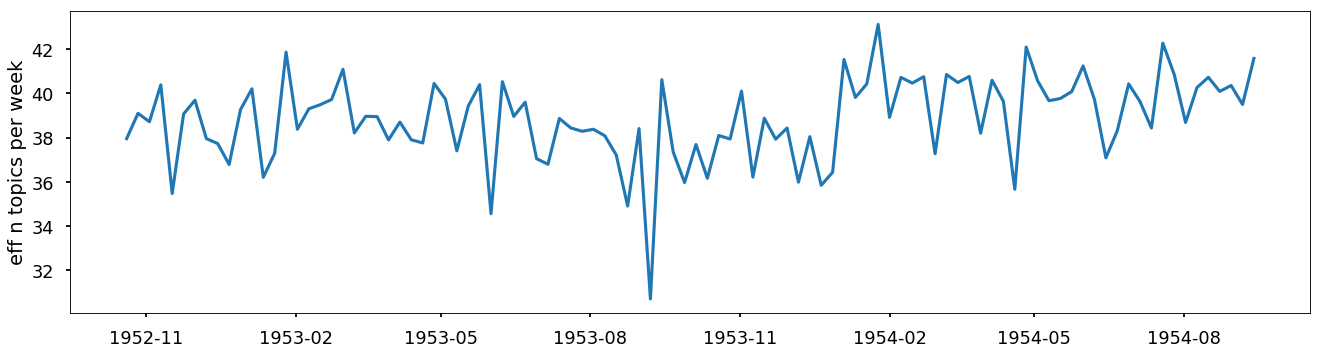

In [101]:
t1, t2 = 300,400

plt.figure(figsize=(20,5))
plt.plot(dates_x[t1:t2], eff_n_topics_per_date[t1:t2]);
plt.ylabel('eff n topics per week');

print(dates[np.argmin(eff_n_topics_per_date)])

1963-10-14 00:00:00


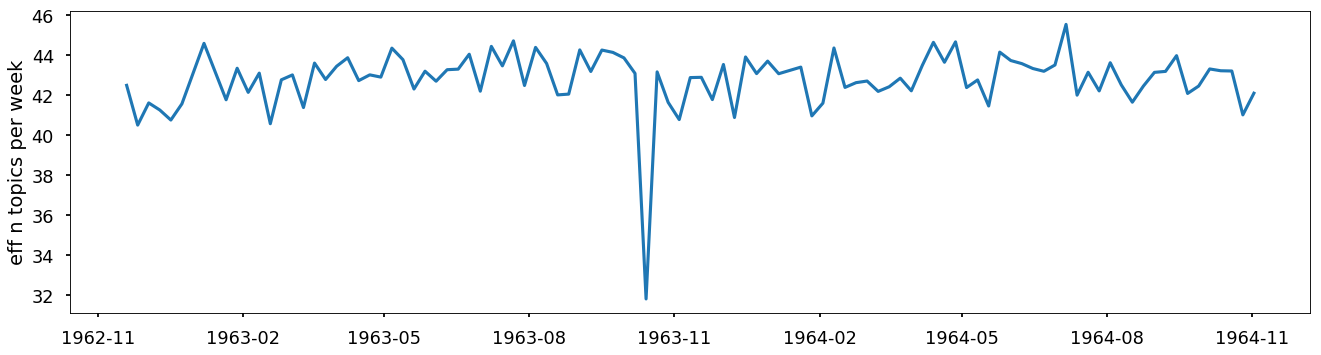

In [105]:
t1, t2 = 825,925

plt.figure(figsize=(20,5))
plt.plot(dates_x[t1:t2], eff_n_topics_per_date[t1:t2]);
plt.ylabel('eff n topics per week');
print(dates[825+np.argmin(eff_n_topics_per_date[825:925])])